In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import gzip
from Bio import SeqIO
import math
import random
import sys



The %autoreload block ensures that the module is reloaded automatically when running to take into account the backend modifications.

In [6]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
%autoreload 2
%aimport ChimFilter
sys.path.append('/home/robin/Elephants/Chimeras/')
import ChimFilter

### Load unfiltered, aligned LAA data:
We can test this approach on all individuals in the MHC dataset. At first glance, it seems some sequences are tractable, and others not. I'd imagine this is linked to how credible the sequences are in the first place... i.e. how many reads are used to support them.

In [3]:
all_sequences, all_names = [], []

# These need to be perfectly aligned
# so far it is done in Geneious with some manual handling, but it's not optimal.
with open("/home/robin/taito/proj/Elephants/mhc/pacbio/testLaa/03_NoChim_small/aligned.fasta", "r") as handle:
    for record in SeqIO.parse(handle, "fasta"):
        if 'Barcode' in record.name:
            all_sequences.append(str(record.seq))
            all_names.append(record.name.strip("_(reversed)"))
            
# We also load the metadata from the LAA analysis:
all_barcodes, fastaname, coverage, accuracy = [], [], [], []
with open("/home/robin/taito/proj/Elephants/mhc/pacbio/testLaa/03_NoChim_small/amplicon_analysis_summary.csv") as handle:
    next(handle)
    for line in handle:
        row = line.split(',')
        all_barcodes.append(row[0])
        fastaname.append(row[1])
        coverage.append(int(row[4]))
        accuracy.append(float(row[6]))
        
barcodes = [x for x in set(all_barcodes)]
barcodes.sort()

covdict = dict(zip(fastaname, coverage))

In [4]:
# Extract the "true" coverage (in SMRTbells, not in subreads)
trueCov = dict()

for bc in barcodes:
    trueCov.update(ChimFilter.CCSCov("/home/robin/taito/proj/Elephants/mhc/pacbio/testLaa/03_NoChim_small/amplicon_analysis_subreads." + bc + ".csv"))

One case example showing all unique permutations for a sample:

Best distance is best coverage
(117, 460, 4, 2)
['BarcodeFi5_01--Ri7_11_Cluster0_Phase0_NumReads496', 'BarcodeFi5_01--Ri7_11_Cluster1_Phase1_NumReads392']


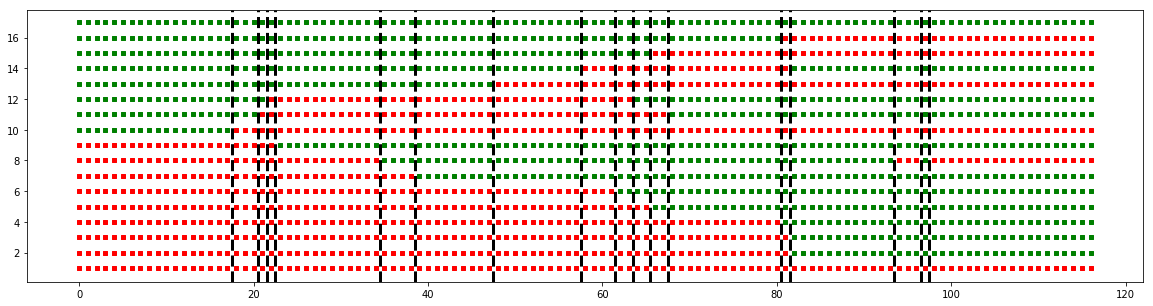

(117, 192, 5, 2)
['BarcodeFi5_01--Ri7_11_Cluster4_Phase1_NumReads214', 'BarcodeFi5_01--Ri7_11_Cluster2_Phase1_NumReads144']


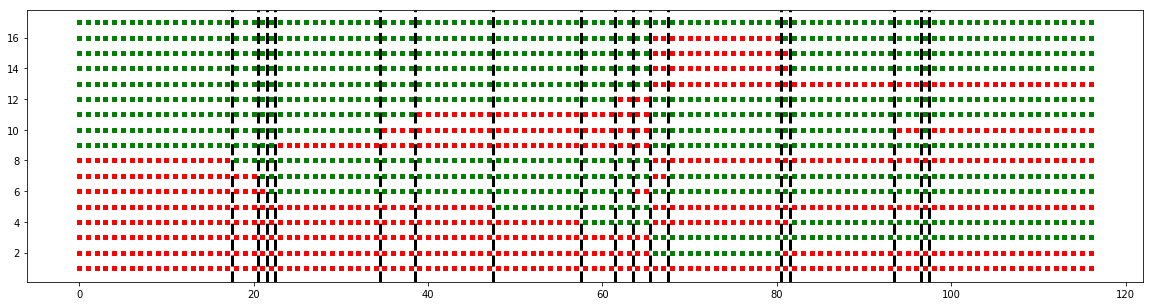

(117, 181, 5, 2)
['BarcodeFi5_01--Ri7_11_Cluster4_Phase3_NumReads176', 'BarcodeFi5_01--Ri7_11_Cluster2_Phase4_NumReads162']


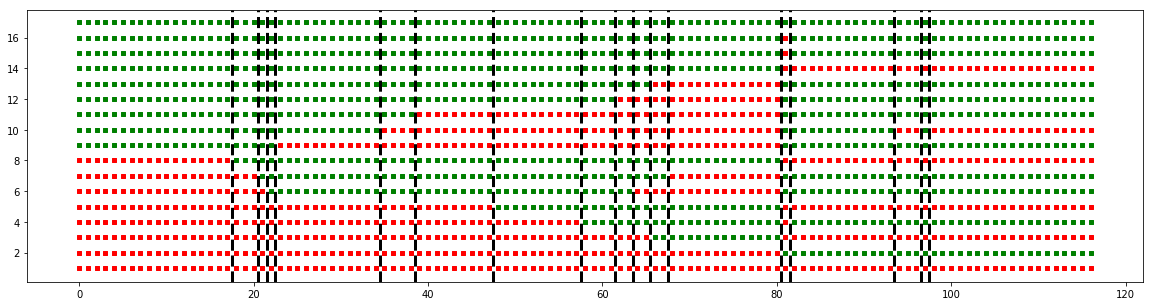

(112, 159, 5, 3)
['BarcodeFi5_01--Ri7_11_Cluster3_Phase3_NumReads217', 'BarcodeFi5_01--Ri7_11_Cluster1_Phase3_NumReads60']


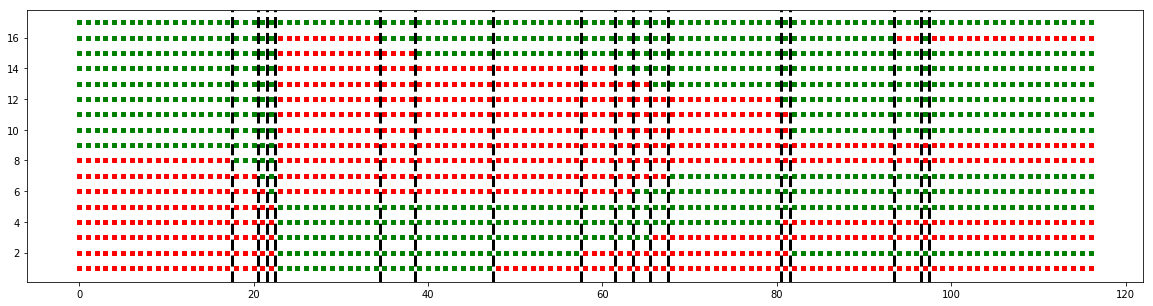

(108, 188, 5, 3)
['BarcodeFi5_01--Ri7_11_Cluster3_Phase1_NumReads218', 'BarcodeFi5_01--Ri7_11_Cluster2_Phase2_NumReads120']


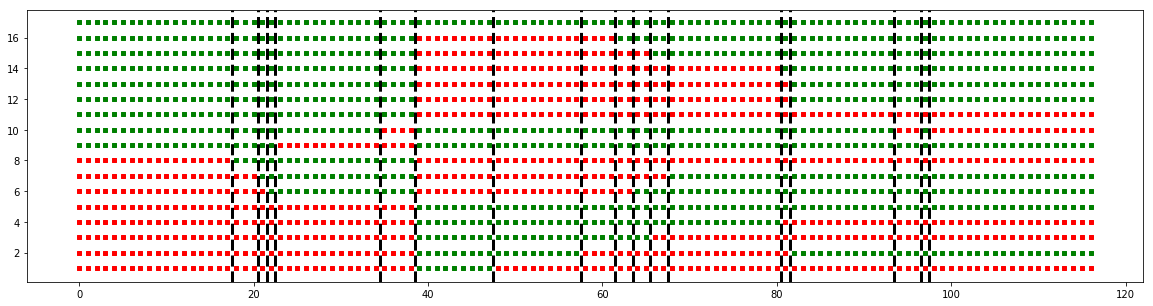

In [18]:
bc = "Fi5_01--Ri7_11"

sequences = []
names = []
for i, n in enumerate(all_names):
    if bc in n:
        sequences.append(all_sequences[i])
        names.append(n)

aln = ChimFilter.code_alignment(sequences, names, trueCov, minCov=10)

permutations = ChimFilter.rank_permutations_optimum(aln)

for i, p in enumerate(permutations[0]):
    print(permutations[1][i])
    print(permutations[2][i])
    ChimFilter.plot_chimeras(p, h=5, s=10)

In [69]:
bc = "Fi5_02--Ri7_05"

sequences = []
names = []
for i, n in enumerate(all_names):
    if bc in n:
        sequences.append(all_sequences[i])
        names.append(n)

aln = ChimFilter.code_alignment(sequences, names, trueCov, minCov=10)
if aln:
    permutations = ChimFilter.rank_permutations_optimum(aln)
    for i, p in enumerate(permutations[0]):
        print(permutations[1][i])
        print(permutations[2][i])
        ChimFilter.plot_chimeras(p, h=5, s=10)
else:
    print("Alignment gapped at all positions")

Alignment gapped at all positions


Best permutation for all samples:

Fi5_01--Ri7_01
Best distance is best coverage
(147, 423, 4, 3)
['BarcodeFi5_01--Ri7_01_Cluster0_Phase0_NumReads498', 'BarcodeFi5_01--Ri7_01_Cluster1_Phase1_NumReads340']


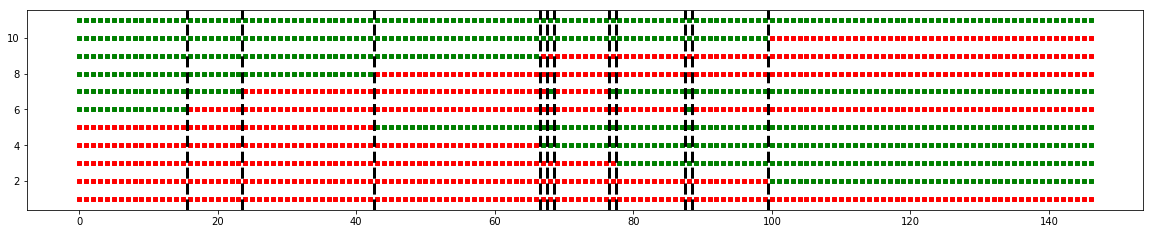

Fi5_01--Ri7_02
Best distance is best coverage
(162, 680, 6, 3)
['BarcodeFi5_01--Ri7_02_Cluster0_Phase0_NumReads499', 'BarcodeFi5_01--Ri7_02_Cluster1_Phase1_NumReads415']


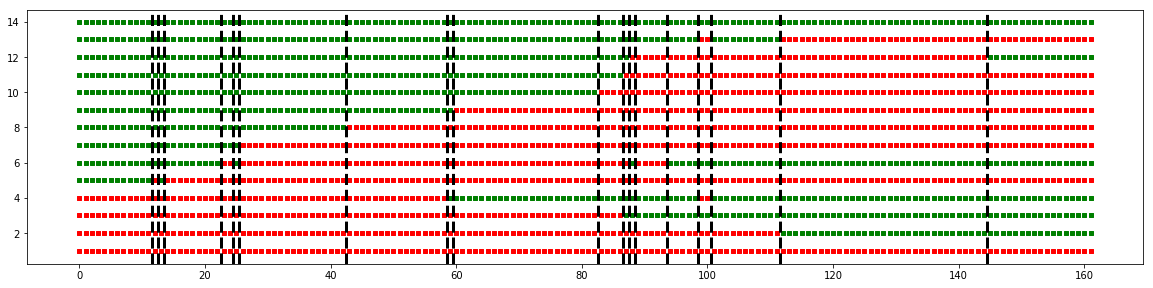

Fi5_01--Ri7_03
Best distance is best coverage
(80, 510, 24, 2)
['BarcodeFi5_01--Ri7_03_Cluster1_Phase4_NumReads224', 'BarcodeFi5_01--Ri7_03_Cluster0_Phase0_NumReads497']


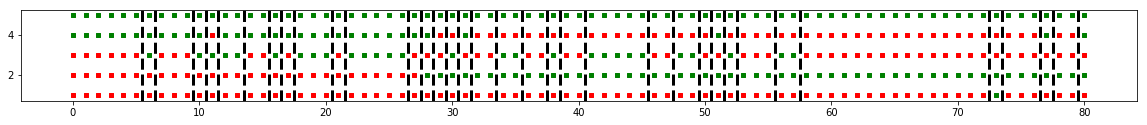

Fi5_01--Ri7_04
Not enough sequences

Fi5_01--Ri7_05
Best distance is best coverage
(138, 625, 1, 1)
['BarcodeFi5_01--Ri7_05_Cluster0_Phase0_NumReads495', 'BarcodeFi5_01--Ri7_05_Cluster1_Phase1_NumReads412']


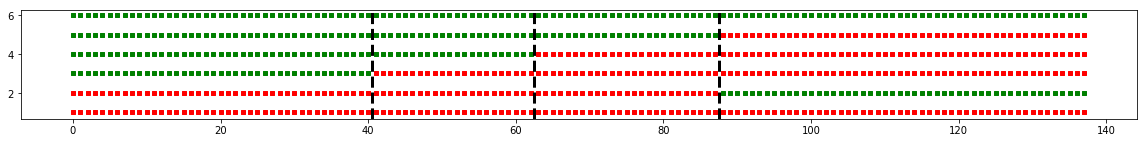

Fi5_01--Ri7_06
Not enough sequences

Fi5_01--Ri7_07
(142, 185, 63, 2)
['BarcodeFi5_01--Ri7_07_Cluster2_Phase5_NumReads256', 'BarcodeFi5_01--Ri7_07_Cluster1_Phase0_NumReads497']


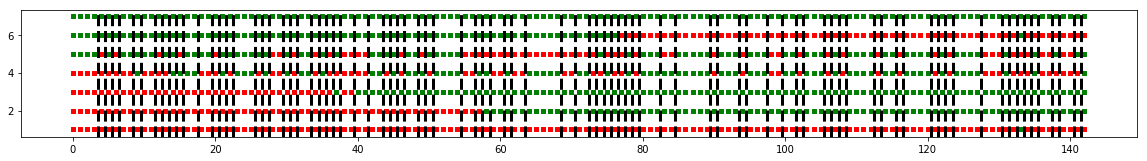

Fi5_01--Ri7_08
Best distance is best coverage
(146, 434, 63, 3)
['BarcodeFi5_01--Ri7_08_Cluster1_Phase3_NumReads262', 'BarcodeFi5_01--Ri7_08_Cluster0_Phase0_NumReads494']


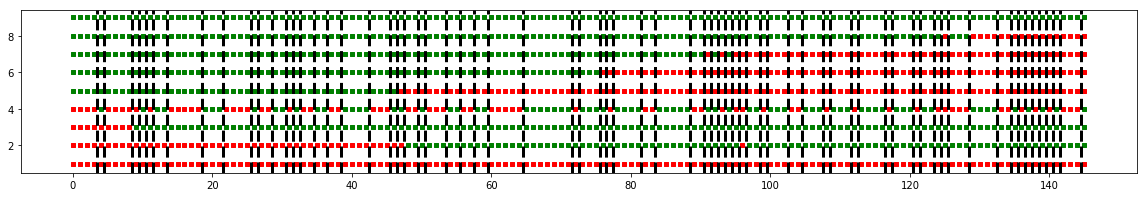

Fi5_01--Ri7_09
Best distance is best coverage
(117, 528, 1, 1)
['BarcodeFi5_01--Ri7_09_Cluster0_Phase0_NumReads499', 'BarcodeFi5_01--Ri7_09_Cluster1_Phase1_NumReads281']


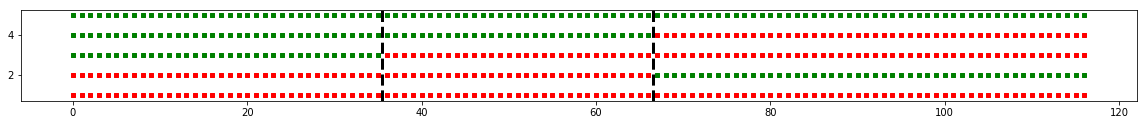

In [ ]:
for bc in barcodes[:]:
    print(bc)
    
    sequences = []
    names = []
    for i, n in enumerate(all_names):
        if bc in n:
            sequences.append(all_sequences[i])
            names.append(n)
    if len(sequences) > 2:
        aln = ChimFilter.code_alignment(sequences, names, trueCov, minCov=1)
        if aln:
            permutations = ChimFilter.rank_permutations_optimum(aln)
            print(permutations[1][0])
            print(permutations[2][0])
            ChimFilter.plot_chimeras(permutations[0][0], h=len(permutations[0][0])/3, s=10)
        else:
            print("Alignment gapped at all positions\n")
    else:
        print("Not enough sequences\n")